**Import the necessary libraries and files**

In [1]:
pip install biopython

     |████████████████████████████████| 2.3MB 8.4MB/s 


In [2]:
from Bio import SeqIO               # for converting FASTA to dataframes
import pandas as pd
import matplotlib.pyplot as plt     # for plotting pie charts
from textwrap import wrap           # for writting files

In [6]:
from google.colab import files
philippines_only = files.upload()

Saving philippines_only.fasta to philippines_only.fasta


**Modelling the original FESTA file**

In [7]:
# FASTA to DataFrame conversion
# sequence with > 10% 'N' characters are excluded

region=[]
date=[]
epi=[]
sequence=[]

n_seq = ('philippines_only.fasta')
for record in SeqIO.parse(n_seq, "fasta"):
    count = 0
    remove = False

    seq = str(record.seq)
    for index in range(len(seq)):
      if count > len(seq) * 0.1:
        remove = True
        break
      
      if seq[index] == 'N':
        count = count + 1

    if (not remove):
      region.append(str(record.id.split("/")[2]))
      date.append(str(record.id.split("/")[3].split("|")[2]))
      epi.append(str(record.id.split("/")[3].split("|")[1]))
      sequence.append(seq)

data ={'Region':region, 'Date':date, 'EPI': epi, 'Sequence':sequence}
df= pd.DataFrame(data)

**COVID-19 Spike Analysis in the Philippines (dates)**

https://doh.gov.ph/2019-nCov?page=3

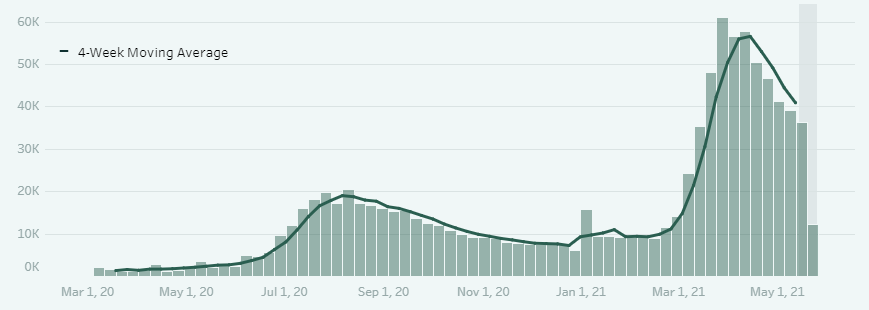

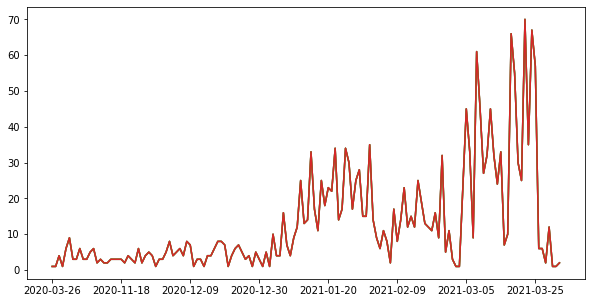

In [8]:
# plot the sequence counts per date

plot_df = df.groupby(data['Date']).count()
plot_df.plot(kind='line',figsize=(10,5),legend=None)

**Get dataset ranging from March to April**

In [9]:
df_temp = df['Date'] > '2021-03'
df_Recent = df[df_temp]

print(len(df_Recent))

866


**Downsize population using Random Sampling**

In [ ]:
# values for n are computed from https://www.surveymonkey.com/mp/sample-size-calculator/
# 90% confidence level, 11% margin of error

df_Recent_sampled = df_Recent.sample(n = 53)

print("Recent: ", len(df_Recent), " to ", len(df_Recent_sampled))

Recent:  866  to  53


**Writing the FASTA file**

In [ ]:
# this is an empty file initially, placeholder for the writing

from google.colab import files
philippines_sampled = files.upload()

In [ ]:
ofile = open("philippines_sampled.fasta", "w")
df_final = df_Recent_sampled

# match header of original FASTA file, append new line per 80 sequence characters
for index, row in df_final.iterrows():
    seq = wrap(row['Sequence'], 80)
    ofile.write(">" + "hCoV-19/Philippines/" + row['Region'] + "/" + row["Date"].split("-")[0] + "|" + row["EPI"] + "|" + row["Date"] + "\n")

    for s in seq:
      ofile.write(s + "\n")

ofile.close()